In [4]:
import json
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Config analysis

In [5]:
area_of_interest = 'Zürich'
geojson_output_path = 'geojsons/day_5_osm_dogmap.geojson'
snapshot_output_path = 'snapshots/day_5_osm_dogmap.json'

# Request OSM Data

In [6]:
nominatim = Nominatim()
areaId = nominatim.query(area_of_interest).areaId()

[nominatim] downloading data: search


### Find trees

In [7]:
overpass = Overpass()
trees_query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='body')
trees_result = overpass.query(trees_query)
trees_result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3601682248)->.searchArea;(node["natural"="tree"](area.searchArea);); out body;


10280

In [8]:
trees_tags, trees_lats, trees_lons = [], [], []
for tree_result in trees_result.elements():
    trees_lats.append(tree_result.lat())
    trees_lons.append(tree_result.lon())
    tree_tags_list = []
    for tag in tree_result.tags():
        if tag != 'natural':
            tree_tags_list.append(f'{tag}: {tree_result.tags()[tag]}')
    tree_tag = ', '.join(tree_tags_list)
    trees_tags.append({'Tags': tree_tag})

In [9]:
trees_gpd = gpd.GeoDataFrame(pd.DataFrame(trees_tags), geometry=gpd.points_from_xy(trees_lons, trees_lats), crs='EPSG:4326')
trees_gpd.head(2)

,Tags,geometry
0,"diameter: 15 m, leaf_type: broadleaved, source...",POINT (8.52580 47.36506)
1,,POINT (8.52839 47.37263)


## Find fountains

In [10]:
drinking_water_query = overpassQueryBuilder(area=areaId, elementType='node', selector='"amenity"="drinking_water"', out='body')
drinking_water_result = overpass.query(drinking_water_query)
drinking_water_result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3601682248)->.searchArea;(node["amenity"="drinking_water"](area.searchArea);); out body;


949

In [11]:
drinking_water_tags, drinking_water_lats, drinking_water_lons = [], [], []
for drinking_water_result in drinking_water_result.elements():
    drinking_water_lats.append(drinking_water_result.lat())
    drinking_water_lons.append(drinking_water_result.lon())
    drinking_water_tag = None
    for tag in drinking_water_result.tags():
        if tag != 'amenity':
            drinking_water_tag = ', '.join(filter(None, (drinking_water_tag, f'{tag}: {drinking_water_result.tags()[tag]}')))
    drinking_water_tags.append({'Tags': drinking_water_tag})

In [12]:
drinking_water_gpd = gpd.GeoDataFrame(pd.DataFrame(drinking_water_tags), geometry=gpd.points_from_xy(drinking_water_lons, drinking_water_lats), crs='EPSG:4326')
drinking_water_gpd.head(2)

,Tags,geometry
0,"bottle: yes, dog: yes, drinking_water:descript...",POINT (8.54128 47.41353)
1,"artist_name: Hans Jakob Meyer, bottle: yes, do...",POINT (8.49994 47.40283)


## Find excrement bags

In [13]:
excrement_bags_query = overpassQueryBuilder(area=areaId, elementType='node', selector='vending=excrement_bags', out='body')
excrement_bags_result = overpass.query(excrement_bags_query)
excrement_bags_result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3601682248)->.searchArea;(node[vending=excrement_bags](area.searchArea);); out body;


114

In [14]:
excrement_bags_tags, excrement_bags_lats, excrement_bags_lons = [], [], []
for excrement_bags_result in excrement_bags_result.elements():
    excrement_bags_lats.append(excrement_bags_result.lat())
    excrement_bags_lons.append(excrement_bags_result.lon())
    excrement_bags_tag = None
    for tag in excrement_bags_result.tags():
        if tag != 'amenity':
            excrement_bags_tag = ', '.join(filter(None, (excrement_bags_tag, f'{tag}: {excrement_bags_result.tags()[tag]}')))
    excrement_bags_tags.append({'Tags': excrement_bags_tag})

In [15]:
excrement_bags_gpd = gpd.GeoDataFrame(pd.DataFrame(excrement_bags_tags), geometry=gpd.points_from_xy(excrement_bags_lons, excrement_bags_lats), crs='EPSG:4326')
drinking_water_gpd.head(2)

,Tags,geometry
0,"bottle: yes, dog: yes, drinking_water:descript...",POINT (8.54128 47.41353)
1,"artist_name: Hans Jakob Meyer, bottle: yes, do...",POINT (8.49994 47.40283)


# Style maps

(8.457003199999999, 8.616633, 47.31683189, 47.43665731)

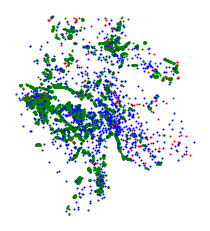

In [16]:
ax = trees_gpd.plot(markersize=1, color='green')
drinking_water_gpd.plot(ax=ax, markersize=1, color='blue')
excrement_bags_gpd.plot(ax=ax, markersize=1, color='red')
ax.axis('off')

### add GeoJSON styles

In [17]:
trees_gpd["fill"]= "true"
trees_gpd["fillColor"]= "#9FE2BF"
trees_gpd["fillOpacity"]= 0.6
trees_gpd["stroke"]= "false"
trees_gpd["color"]= "#9FE2BF"
trees_gpd["opacity"]= 1
trees_gpd["weight"]= 2
trees_gpd["radius"]= 10
trees_gpd["title"]= 'tree'
trees_gpd["description"]= trees_gpd.Tags

In [18]:
drinking_water_gpd["fillColor"]= "#6495ED"
drinking_water_gpd["fill"]= "true"
drinking_water_gpd["fillOpacity"]= 0.6
drinking_water_gpd["stroke"]= "false"
drinking_water_gpd["color"]= "#6495ED"
drinking_water_gpd["opacity"]= 1
drinking_water_gpd["weight"]= 2
drinking_water_gpd["radius"]= 10
drinking_water_gpd["title"]= 'public water fountains'
drinking_water_gpd["description"]= drinking_water_gpd.Tags

In [19]:
excrement_bags_gpd["fill"]= "true"
excrement_bags_gpd["fillColor"]= "#FF7F50"
excrement_bags_gpd["fillOpacity"]= 0.6
excrement_bags_gpd["stroke"]= "false"
excrement_bags_gpd["color"]= "#FF7F50"
excrement_bags_gpd["opacity"]= 1
excrement_bags_gpd["weight"]= 2
excrement_bags_gpd["radius"]= 20
excrement_bags_gpd["title"]= 'dog excrement bag dispenser'
excrement_bags_gpd["description"]= excrement_bags_gpd.Tags

### combine all GeoDataFrames

In [20]:
concatenated_gpd = pd.concat([trees_gpd, drinking_water_gpd, excrement_bags_gpd])
concatenated_gpd = concatenated_gpd.drop('Tags', axis=1)

### save GeoJSON file

In [21]:
concatenated_gpd.to_file(geojson_output_path, driver="GeoJSON")

# Export as snapshot with inline GeoJSON

In [22]:
with open(geojson_output_path) as json_file:
    geojson_dict = json.load(json_file)

In [23]:
long1, lat1, long2, lat2 = concatenated_gpd.unary_union.bounds
bounds = [f"geo:{min([lat1+0.05, lat2+0.05])},{min([long1+0.05, long2+0.05])}",f"geo:{max([lat1-0.05, lat2-0.05])},{max([long1-0.05, long2-0.05])}"]

In [24]:
snapshot = {
    "name": "Dog Friendly Locations",
    "profile": "https://raw.githubusercontent.com/cividi/spatial-data-package-spec/main/schemas/snapshot.json",
    "author": "Sven Brieden <sven@cividi.ch>",
    "views": [
        {
            "name": "mapview",
            "resources": ["geojson-resource", "mapbox-background"],
            "specType": "gemeindescanSnapshot",
            "spec": {
                "title": "Dog Friendly Locations",
                "description": "The most important spots in Zurich for a successful walk with your dog are shown.",
                "bounds": bounds,
                "legend": [
                    {
                        "label": "A tree",
                        "shape": "circle",
                        "size": 1,
                        "primary": "true",
                        "fillColor": "#9FE2BF",
                        "fillOpacity": 0.8,
                        "strokeColor": "#9FE2BF",
                        "strokeOpacity": 1,
                        "strokeWidth": 2,
                    },
                    {
                        "label": "public water fountains ",
                        "shape": "circle",
                        "size": 1,
                        "primary": "true",
                        "fillColor": "#6495ED",
                        "fillOpacity": 0.6,
                        "strokeColor": "#6495ED",
                        "strokeOpacity": 1,
                        "strokeWidth": 2,
                    },
                    {
                        "label": "dog excrement bag dispenser ",
                        "shape": "circle",
                        "size": 1,
                        "primary": "true",
                        "fillColor": "#FF7F50",
                        "fillOpacity": 0.6,
                        "strokeColor": "#FF7F50",
                        "strokeOpacity": 1,
                        "strokeWidth": 2,
                    },
                ],
            },
        }
    ],
    "resources": [
        {
            "name": "geojson-resource",
            "mediatype": "application/vnd.simplestyle-extended",
            "data":  geojson_dict,
        },
        {
            "name": "mapbox-background",
            "path": "mapbox://styles/gemeindescan/ck6rp249516tg1iqkmt48o4pz",
            "mediatype": "application/vnd.mapbox-vector-tile",
        },
    ],
    "sources": [
        {
            "title": "Karte: Mapbox, \u00a9 OpenStreetMap",
            "url": "https://www.openstreetmap.org/copyright",
        },
    ],
}

In [25]:
with open(snapshot_output_path, 'w') as fp:
    json.dump(snapshot, fp)